## Einnahmeüberschussrechnung




<img width="60%" class="imgright" src="../images/geldbewegung.webp" srcset="../images/geldbewegung_800w.webp 800w,../images/geldbewegung_700w.webp 700w,../images/geldbewegung_600w.webp 600w,../images/geldbewegung_500w.webp 500w,../images/geldbewegung_400w.webp 400w,../images/geldbewegung_350w.webp 350w,../images/geldbewegung_300w.webp 300w" alt="Geldfluss" />


Bei der in Deutschland benutzten Einnahmenüberschussrechnung (EÜR), - in Österreich als Einnahmen-Ausgaben-Rechnung (E/A-Rechnung) bekannt - handelt es sich um eine vereinfachte Gewinnermittlungsmethode, die so vom Gesetz vorgegeben und und für bestimmte Berufsgruppen anerkannt ist. Einnahmenüberschussrechnung ist sowohl in Deutschland als auch in Österreich im § 4 Abs. 3 des jeweiligen Einkommensteuergesetzes (EStG) geregelt. Alle Stuerpflichtigen, die nicht zuur doppelten Buchführung verpflichtet sind, dürfen dieses vereinfachte Verfahren zuur Gewinnermittler verwenden. 
Bei der E*R gilt das Zufluss- und Abflussprinzip, das bedeutet das lediglich die Einnahmen bzw. Ausgaben zu berücksichtigen sind, die in dem entsprechenden Wirtschaftsjahr vereinnahmt bzw. gezahlt wurden. Bestandsveränderungen bleiben unberücksichtigt. Auch wenn hier und an anderen Stellen imer von "vereinfacht" oder von "einfacher" Gewinnermittlungsmethode die Rede ist, so darf das nicht darüber hinweg täuschen, dasss auch bei dieser Methode viele gesetzlichen Regeln zu beachten sind. Im Rahmen dieses Tutorials kann natürlich nicht auf die komplexe Materie eingegangen werden. Die hier vorgestellten Verfahren können für die eigene EÜr verwendet werden, aber es kann keine Garantie auf die Richtigkeit gegeben werden. 

Wir sind hauptsächlich daran interessiert, die verschiedenen Möglichkeiten vorzustellen, wie Pandas und Python zur Einnahmeüberschussrechnung benutzt werden können. Wir zeigen, wie es mit Python möglich ist, den Geldfluss zu überwachen und zu visualisieren. Auf diese Weise kann man sich einen besseren Überblick über die finanzielle Situation des Betriebes oder der selbständigen Tätigkeit verschaffen. Die hier vorgestellten Algorithmen können auch steuerlich eingesetzt werden. Aber seien Sie gewarnt, dies ist eine sehr allgemeine Behandlung der Angelegenheit und muss an die tatsächliche Steuersituation angepasst werden, d.h. es kann keine Gewähr für die steuerliche Richtigkeit übernommen werden.

Im Ordner ```data1``` befindet sich eine Excel-Datei ```net_income_method_2020.xlsx``` mit den Buchhaltungsdaten eines fiktiven Unternehmens.


### Journaldatei

Dieses Excel-Dokument enthält zwei Datenblätter: eines mit den tatsächlichen Daten "journal" und eines mit dem Namen "account numbers" (Kontonummern), das die Zuordnung von den Kontonummern zur Beschreibung enthält.
<br>
<img width=70% src="../images/einnahme_ueberschuss_rechnung_excel.webp" srcset="../images/einnahme_ueberschuss_rechnung_excel_800w.webp 800w,../images/einnahme_ueberschuss_rechnung_excel_700w.webp 700w,../images/einnahme_ueberschuss_rechnung_excel_600w.webp 600w,../images/einnahme_ueberschuss_rechnung_excel_500w.webp 500w,../images/einnahme_ueberschuss_rechnung_excel_400w.webp 400w,../images/einnahme_ueberschuss_rechnung_excel_350w.webp 350w,../images/einnahme_ueberschuss_rechnung_excel_300w.webp 300w" alt="Einnahmeüberschussrechnung unter Excel" />

<br><br>
<img width=70% src="../images/kontonummer_beschreibung_excel.webp" srcset="../images/kontonummer_beschreibung_excel_800w.webp 800w,../images/kontonummer_beschreibung_excel_700w.webp 700w,../images/kontonummer_beschreibung_excel_600w.webp 600w,../images/kontonummer_beschreibung_excel_500w.webp 500w,../images/kontonummer_beschreibung_excel_400w.webp 400w,../images/kontonummer_beschreibung_excel_350w.webp 350w,../images/kontonummer_beschreibung_excel_300w.webp 300w" alt="Kontonummer Beschreibung" />



Wir werden diese Excel-Datei in zwei DataFrame-Objekte lesen:

In [1]:
import pandas as pd

with pd.ExcelFile("data1/net_income_method_2020.xlsx") as xl:
    accounts2descr = xl.parse("account numbers", 
                              index_col=0)
    journal = xl.parse("journal", 
                       index_col=0,
                      )
    
journal.index = pd.to_datetime(journal.index)
journal.index

DatetimeIndex(['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02',
               '2020-04-02', '2020-04-02', '2020-04-05', '2020-04-05',
               '2020-04-05', '2020-04-05', '2020-04-09', '2020-04-09',
               '2020-04-10', '2020-04-10', '2020-04-10', '2020-04-10',
               '2020-04-10', '2020-04-10', '2020-04-13', '2020-04-13',
               '2020-04-13', '2020-04-26', '2020-04-26', '2020-04-26',
               '2020-04-26', '2020-04-27', '2020-05-03', '2020-05-03',
               '2020-05-03', '2020-05-03', '2020-05-05', '2020-05-05',
               '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-11', '2020-05-11', '2020-05-11', '2020-05-11',
               '2020-05-13', '2020-05-18', '2020-05-25', '2020-05-25',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-03',
               '2020-06-04', '2020-06-04', '2020-06-09', '2020-06-10',
               '2020-06-10', '2020-06-11', '2020-06-11', '2020-06-11',
      

Die erste ist die Registerkarte "Kontonummern", die die Zuordnung von den Kontonummern zur Beschreibung der Konten enthält: 

In [2]:
accounts2descr

,description
account,
4400,revenue plant Munich
4401,revenue plant Frankfurt
4402,revenue plant Berlin
2010,souvenirs
2020,clothes
2030,other articles
2050,books
2100,insurances
2200,wages


Das zweite Datenblatt "journal" enthält die eigentlichen Journaleinträge:

In [3]:
journal[:10]

,account number,document number,description,tax rate,gross amount
date,,,,,
2020-04-02,4402,8983233038,"Zurkan, Köln",19,4105.98
2020-04-02,2010,57550799,"Birmann, Souvenirs",19,-1890.00
2020-04-02,2200,14989004,wages,0,-17478.23
2020-04-02,2500,12766279,"Filling Station, Petrol",19,-89.40
2020-04-02,4400,3733462359,"EnergyCom, Hamburg",19,4663.54
2020-04-02,4402,7526058231,"Enoigo, Strasbourg",19,2412.82
2020-04-05,4402,1157284466,"Qbooks, Frankfurt",7,2631.42
2020-04-05,4402,7009463592,"Qbooks, Köln",7,3628.45
2020-04-05,2020,68433353,"Jamdon, Clothes",19,-1900.00


Es gibt viele Möglichkeiten, diese Daten zu analysieren. Wir können zum Beispiel alle Konten zusammenfassen:

In [4]:
account_sums = journal[["account number", "gross amount"]].groupby("account number").sum()
account_sums

,gross amount
account number,
2010,-4090.00
2020,-10500.80
2030,-1350.00
2050,-900.00
2100,-612.00
2200,-69912.92
2300,-18791.92
2400,-1597.10
2500,-89.40


### Diagramme der Konten


Wie wäre es mit einer Visualisierung dieser Kontendaten? Dazu könnten wir beispielsweise Kreisdiagramme, auch Kuchendiagramme genannt, benutzen. Im Englischen bezeichnet man sie als "pie charts". Nun haben wir aber ein kleines Problem: Kreisdiagramme dürfen keine negativen Werte enthalten. Dies ist jedoch kein wirkliches Problem. Wir können die Konten in Einnahmen- und Ausgabenkonten aufteilen. Das entspricht natürlich auch mehr dem, was wir wirklich sehen wollen.

#### Diagramme für die Einnahmekonten (Kreditoren)

Wir erstellen einen DataFrame mit den Einkommenskonten:

In [5]:
income_accounts = account_sums[account_sums["gross amount"] > 0]
income_accounts

,gross amount
account number,
4400,37771.84
4401,69610.35
4402,61593.99


Wir können diese Werte jetzt in einem Kreisdiagramm visualisieren.

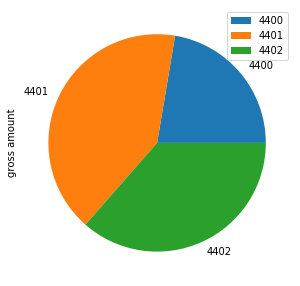

In [6]:
plot = income_accounts.plot(y='gross amount', figsize=(5, 5), kind="pie")

Die Position der Legende gefällt Ihnen wahrscheinlich nicht? Mit dem Parameter ```bbox_to_anchor``` können wir ihn an einer gewünschten Position positionieren. Wenn wir wollen, können wir es sogar außerhalb des Grundstücks verschieben. Mit den relativen Koordinatenwerten `` `(0.5, 0.5)` `` positionieren wir die Legende in der Mitte des Diagramms.
Die Legende ist ein Rechteck. Die Frage ist also, was die Position (0,5, 0,5) bedeutet. Wir können dies definieren, indem wir zusätzlich den Parameter `` `loc``` verwenden:


|```loc```-Wert | Bedeutung|
|---|---|
|upper left | ```bbox_to_anchor``` bezeichnet die Position der linken oberen Ecke des Legenden-Rechtecks|
|upper right | entsprechend die rechte obere Ecke|
|lower left | die linke untere Ecke|
|lower left | die rechte untere Ecke|


Wir verwenden dies, um die Legende mit der linken oberen Ecke in der Mitte des Plots zu positionieren:

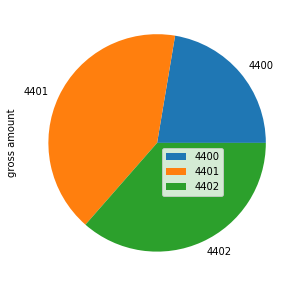

In [7]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5),
                            kind="pie")
plot.legend(bbox_to_anchor=(0.5, 0.5),
            loc="upper left")

Jetzt positionieren wir die untere rechte Ecke der Legende in der Mitte des Diagramms:

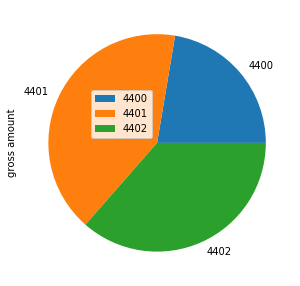

In [8]:
plot = income_accounts.plot(y='gross amount', figsize=(5, 5), kind="pie")
plot.legend(bbox_to_anchor=(0.5, 0.5),
            loc="lower right")

Es gibt noch eine andere Sache, die wir verbessern können. Wir sehen die Bezeichnungen 4400, 4401 und 4402 neben jedem Kuchensegment. Außerdem sehen wir sie in der Legende. Dies sind hässliche und redundante Informationen. Im Folgenden werden wir die Beschriftungen im Plot deaktivieren, d.h. wir werden sie auf eine leere Zeichenfolge setzen, und wir setzen sie explizit in der Legendenmethode. Allerdings setzen wir sie nicht auf die Kontonummern sondern auf die dazugehörige Beschreibung:

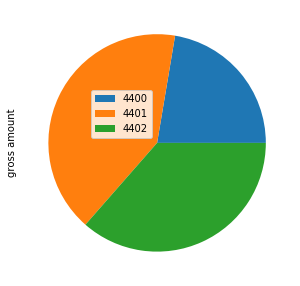

In [9]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5), 
                            kind="pie",
                            labels=['', '', ''])
plot.legend(bbox_to_anchor=(0.5, 0.5),
            labels=income_accounts.index)


Now, we are close to perfection. Just one more tiny thing. Some might prefer to see the actual description text rather than an account number. We will cut out this information from the DataFrame ```accounts2descr``` by using ```loc``` and the list of desired numbers ```[4400, 4401, 4402]```. The result of this operation will be the argument of the ```set_index``` method. (Atention: ```reindex``` is not giving the wanted results!)

In [10]:
s = accounts2descr["description"].loc[[4400, 4401, 4402]]
income_accounts.set_index(s, inplace=True)

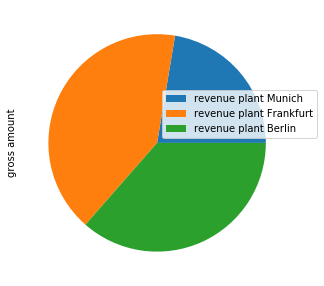

In [11]:
descriptions = accounts2descr["description"].loc[[4400, 4401, 4402]]


plot = income_accounts.plot(kind="pie",
                            y='gross amount', 
                            figsize=(5, 5),
                            labels=['', '', ''])

plot.legend(bbox_to_anchor=(0.5, 0.5), 
            loc="lower left",
            labels=descriptions)

Soll es doch lieber ein Säulendiagramm sein? Kein Problem, wir müssen nur den Parameter ```kind ``` auf ```bar``` statt auf ```pie``` setzen:

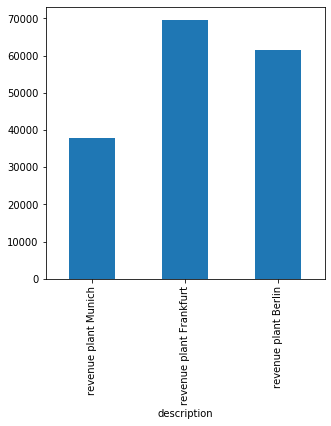

In [12]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5), 
                            kind="bar",
                            legend=False)

Für Balkendiagramme müssen müssen wir ```kind ``` auf ```barh``` setzen. Damit es nicht zu langweilig wird können wir die Balken auch einfärben, indem wir dem Parameter ```color``` eine Liste mit Farben übergeben:

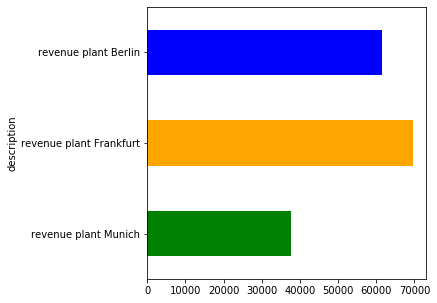

In [13]:
plot = income_accounts.plot(y='gross amount', 
                            figsize=(5, 5), 
                            kind="barh",
                            legend=False,
                            color=['green', 'orange', 'blue'])

#### Diagramme für die Ausgabenkonten (Debitoren)

Das Gleiche können wir jetzt mit unseren Debitoren (Spesenabrechnungen) tun:

In [14]:
expenses_accounts = account_sums[account_sums["gross amount"] < 0]
expenses_accounts

,gross amount
account number,
2010,-4090.00
2020,-10500.80
2030,-1350.00
2050,-900.00
2100,-612.00
2200,-69912.92
2300,-18791.92
2400,-1597.10
2500,-89.40


In [15]:
acc2descr_expenses = accounts2descr["description"].loc[expenses_accounts.index]
acc2descr_expenses

account number
2010            souvenirs
2020              clothes
2030       other articles
2050                books
2100           insurances
2200                wages
2300                loans
2400               hotels
2500               petrol
2600    telecommunication
2610             internet
Name: description, dtype: object

In [16]:
expenses_accounts.set_index(acc2descr_expenses.values, inplace=True)

expenses_accounts *= -1

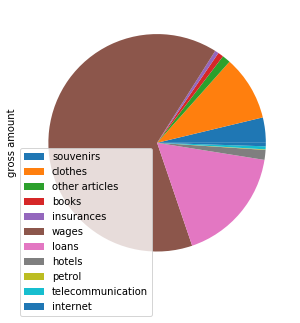

In [17]:
labels = [''] * len(expenses_accounts)
plot = expenses_accounts.plot(kind="pie",
                            y='gross amount', 
                            figsize=(5, 5),
                            labels=labels)
plot.legend(bbox_to_anchor=(0.5, 0.5), 
            labels=expenses_accounts.index)

### Tax Sums

We will sum up the amount according to their tax rate.

In [18]:
journal.drop(columns=["account number"])

,document number,description,tax rate,gross amount
date,,,,
2020-04-02,8983233038,"Zurkan, Köln",19,4105.98
2020-04-02,57550799,"Birmann, Souvenirs",19,-1890.00
2020-04-02,14989004,wages,0,-17478.23
2020-04-02,12766279,"Filling Station, Petrol",19,-89.40
2020-04-02,3733462359,"EnergyCom, Hamburg",19,4663.54
...,...,...,...,...
2020-07-25,5204418668,"BoKoData, Bodensee, Konstanz",19,3678.38
2020-07-25,85241331,"Hotel, Konstanz",7,-583.00
2020-07-27,26865618,"Hotel, Franfurt",7,-450.00


Im Folgenden definieren wir nun eine Funktion ```steuersummen```, die die Mehrwertsteuersummen nach Steuersätzen aus einem Journal-DataFrame berechnet:

In [24]:

def steuersummen(journal_df, months=None):
    """ Liefert ein DataFrame mit den Umsätzen und Steuersätzen zurück-
        Wird months eine Zahl oder Liste übergeben, werden nur die Umsätze 
        der entshrechenden Monate berücksichtigt.
        Beispiel: steuersummen(df, months=[3, 6]) bedeutet nur die Monate
        3 (März) und 6 (Juni)"""
    if months:
        if isinstance(months, int):
            month_cond = journal_df.index.month == months
        elif isinstance(months, (list, tuple)):
            month_cond = journal_df.index.month.isin(months)
        positive = journal_df["gross amount"] > 0
        umsatzsteuern = journal_df[positive & month_cond]
        negative = journal_df["gross amount"] < 0
        vorsteuern = journal_df[negative & month_cond]   
    else:
        umsatzsteuern = journal_df[journal_df["gross amount"] > 0]
        vorsteuern = journal_df[journal_df["gross amount"] < 0]
    
    umsatzsteuern = umsatzsteuern[["tax rate", "gross amount"]].groupby("tax rate").sum()
    umsatzsteuern.rename(columns={"gross amount": "Umsaetze brutto"},
                         inplace=True)
    umsatzsteuern.index.name = 'Steuerrate'
    
    vorsteuern = vorsteuern[["tax rate", "gross amount"]].groupby("tax rate").sum()
    vorsteuern.rename(columns={"gross amount": "Ausgaben brutto"},
                      inplace=True)
    vorsteuern.index.name = 'Steuerrate'
    
    steuern = pd.concat([vorsteuern, umsatzsteuern], axis=1)
    steuern.insert(1, 
                   column="Vorsteuer", 
                   value=(steuern["Ausgaben brutto"] * steuern.index / 100).round(2))
    steuern.insert(3, 
                   column="Umsatzsteuer", 
                   value=(steuern["Umsaetze brutto"] * steuern.index / 100).round(2))

    return steuern.fillna(0)


steuersummen(journal)

,Ausgaben brutto,Vorsteuer,Umsaetze brutto,Umsatzsteuer
Steuerrate,,,,
0,-90102.20,-0.00,8334.43,0.00
7,-3847.10,-269.30,11240.71,786.85
19,-14948.32,-2840.18,149401.04,28386.20


In [21]:
stsum_5 = steuersummen(journal, months=5)
stsum_6 = steuersummen(journal, months=6)
stsum_5

,Ausgaben brutto,Vorsteuer,Umsaetze brutto,Umsatzsteuer
Steuerrate,,,,
0,-22411.53,-0.00,0.00,0.00
7,-900.00,-63.00,0.00,0.00
19,-145.00,-27.55,31328.98,5952.51


In [22]:
stsum_6

,Ausgaben brutto,Vorsteuer,Umsaetze brutto,Umsatzsteuer
Steuerrate,,,,
0,-22400.61,-0.00,6479.47,0.00
7,0.00,0.00,4980.84,348.66
19,-123.12,-23.39,34570.25,6568.35


In [23]:
stsum_5 + stsum_6

,Ausgaben brutto,Vorsteuer,Umsaetze brutto,Umsatzsteuer
Steuerrate,,,,
0,-44812.14,-0.00,6479.47,0.00
7,-900.00,-63.00,4980.84,348.66
19,-268.12,-50.94,65899.23,12520.86


In [25]:
steuersummen(journal, months=[5, 6])

,Ausgaben brutto,Vorsteuer,Umsaetze brutto,Umsatzsteuer
Steuerrate,,,,
0,-44812.14,-0.00,6479.47,0.00
7,-900.00,-63.00,4980.84,348.66
19,-268.12,-50.94,65899.23,12520.85
